# Data Exploration of Sentiment140 Dataset (Raw Data)

This notebook explores the Sentiment140 dataset using raw data files. We will load the dataset, perform basic data exploration, and visualize some key statistics.

## Import Libraries

In [1]:
import sys
import os

In [2]:
# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', '..', 'src')))

In [3]:
import pandas as pd
import plotly.express as px
from IPython.display import Image
import kaleido
from data.load_raw_data import load_sentiment140_raw

# Ensure the directory for figures exists

In [4]:
# Ensure the directory exists
output_dir = os.path.join('..', '..', 'reports', 'figures', 'eda')
os.makedirs(output_dir, exist_ok=True)

## Load the Dataset

We will load the Sentiment140 dataset from the raw CSV file and display some basic information about it.

In [5]:
file_path = '../../data/raw/training.1600000.processed.noemoticon.csv'  # The path to data file
df = load_sentiment140_raw(file_path)

In [6]:
# Display basic information about the DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   label   1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None
                                                text  label
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...      0
1  is upset that he can't update his Facebook by ...      0
2  @Kenichan I dived many times for the ball. Man...      0
3    my whole body feels itchy and like its on fire       0
4  @nationwideclass no, it's not behaving at all....      0


## Visualize Class Distribution

Let's visualize the distribution of sentiment labels in the dataset.

In [7]:
# Create a DataFrame for plotting
df_counts = df['label'].value_counts().reset_index()
df_counts.columns = ['Sentiment', 'Count']
df_counts['Sentiment'] = df_counts['Sentiment'].map({0: 'Negative', 1: 'Positive'})

In [8]:
# Create a bar plot for sentiment distribution
fig = px.bar(df_counts, x='Sentiment', y='Count', color='Sentiment', 
             labels={'Sentiment': 'Sentiment', 'Count': 'Count'},
             title='Sentiment Distribution of Sentiment140 Dataset',
             color_discrete_map={'Negative': '#FF6347', 'Positive': '#4682B4'})

# Update layout for better aesthetics
fig.update_layout(
    title={
        'text': 'Sentiment Distribution of Sentiment140 Dataset',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'family': "Times New Roman, serif", 'size': 24, 'color': 'black'}
    },
    xaxis_title={
        'text': 'Sentiment',
        'font': {'family': "Times New Roman, serif", 'size': 18, 'color': 'black'}
    },
    yaxis_title={
        'text': 'Count',
        'font': {'family': "Times New Roman, serif", 'size': 18, 'color': 'black'}
    },
    font=dict(family="Times New Roman, serif", size=16, color="black"),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey', zeroline=False, tickfont={'size': 14}),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', zeroline=False, tickfont={'size': 14}),
    legend=dict(
        title={'text': 'Sentiment', 'font': {'family': "Times New Roman, serif", 'size': 16, 'color': 'black'}},
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict(family="Times New Roman, serif", size=14, color="black")
    )
)

# Add annotations with better positioning
for i, row in df_counts.iterrows():
    fig.add_annotation(
        x=row['Sentiment'],
        y=row['Count'],
        text=f"{row['Count']:,}",
        showarrow=False,
        font=dict(family="Times New Roman, serif", size=14, color="black"),
        align='center',
        yshift=10  # Adjust this value as needed to prevent overlap
    )

# Show the plot
fig.show()

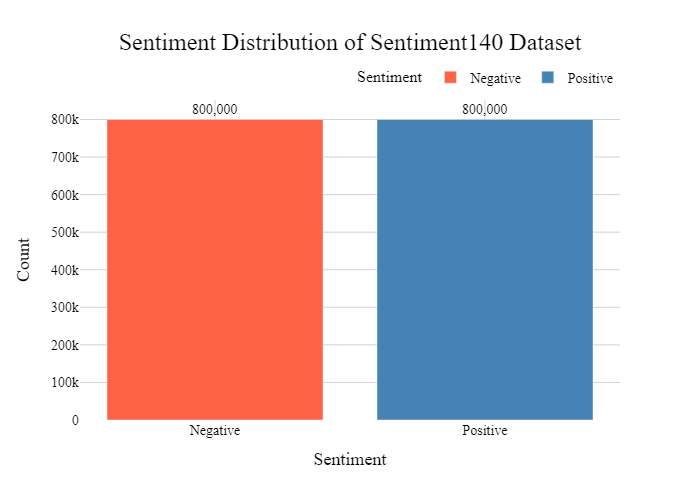

In [10]:
# Define the path to save the figure
save_path = os.path.join(output_dir, 'class_distribution_plotly.png')
print(f"Saving the plot to {save_path}")

# Save the plot as an image file
fig.write_image(save_path, engine='orca')

# Display the saved image in the notebook
Image(save_path)

## Display Sample Tweets

Finally, we will display some example tweets from the dataset.

In [11]:
# Display some example tweets
print(df['text'].sample(10))

217350     @silent_hill2  I wanted to!!! None of my frien...
892928                        @RealRalphyG RaLpHY WaLpHy!!! 
437662     Ryan Sheckler.com oh boy i love that thing! I ...
1572603    I hate going to bed upset...we are fine now......
379771     well my redbull didnt have coke in it.I'm tire...
1482140                                 About to eat fresh. 
1267911     So yeah, I missed a few replies... DEAL WITH IT 
995827     family road trip to wisconsin! and it's my bir...
1343949    Bought new trail runners. Broke them in with a...
1121472    @cocosworld http://twitpic.com/3xxt9 - Back th...
Name: text, dtype: object


### TODO

- word cloud



1. Class Distribution
Bar Chart: Display the distribution of positive and negative sentiment labels to understand the balance of the dataset.
2. Text Length Analysis
Histogram: Show the distribution of tweet lengths (number of characters or words) to understand the typical length of the tweets.
3. Word Cloud
Word Cloud: Visualize the most common words in the tweets to get a sense of frequently occurring terms.
4. Sentiment Distribution by Length
Box Plot: Compare the distribution of tweet lengths between positive and negative sentiments.
5. Common Words by Sentiment
Bar Chart: Display the top N most common words for both positive and negative sentiments to identify distinct language patterns.
6. N-grams Analysis
Bar Chart: Show the most common bi-grams and tri-grams to understand common phrases in the tweets.
7. Sentiment Over Time
Line Chart: If the dataset includes timestamps, plot the sentiment distribution over time to identify trends or shifts in sentiment.
8. User Analysis
Bar Chart: Show the distribution of the number of tweets per user to identify if there are any prolific tweeters in the dataset.
9. Hashtag Analysis
Bar Chart: Display the most common hashtags used in the tweets to identify popular topics or trends.
10. Sentiment by User
Box Plot: Analyze the distribution of sentiments per user to see if some users have a predominant sentiment.